In [24]:
import re
from pprint import pprint
from difflib import SequenceMatcher
import cv2
from matplotlib import pyplot as plt
import easyocr

In [25]:
def show_color_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

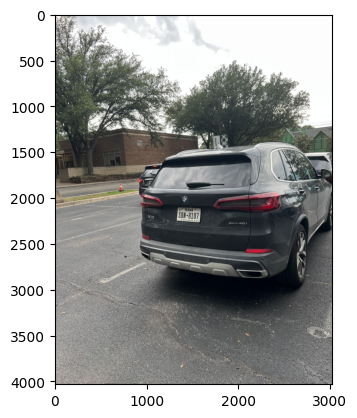

In [26]:
image = cv2.imread('Gen.jpg')
show_color_image(image)

In [27]:
states_list = [
    "ALABAMA",
    "ALASKA",
    "ARIZONA",
    "ARKANSAS",
    "CALIFORNIA",
    "COLORADO",
    "CONNECTICUT",
    "DELAWARE",
    "FLORIDA",
    "GEORGIA",
    "HAWAII",
    "IDAHO",
    "ILLINOIS",
    "INDIANA",
    "IOWA",
    "KANSAS",
    "KENTUCKY",
    "LOUISIANA",
    "MAINE",
    "MARYLAND",
    "MASSACHUSETTS",
    "MICHIGAN",
    "MINNESOTA",
    "MISSISSIPPI",
    "MISSOURI",
    "MONTANA",
    "NEBRASKA",
    "NEVADA",
    "NEW HAMPSHIRE",
    "NEW JERSEY",
    "NEW MEXICO",
    "NEW YORK",
    "NORTH CAROLINA",
    "NORTH DAKOTA",
    "OHIO",
    "OKLAHOMA",
    "OREGON",
    "PENNSYLVANIA",
    "RHODE ISLAND",
    "SOUTH CAROLINA",
    "SOUTH DAKOTA",
    "TENNESSEE",
    "TEXAS",
    "UTAH",
    "VERMONT",
    "VIRGINIA",
    "WASHINGTON",
    "WEST VIRGINIA",
    "WISCONSIN",
    "WYOMING",
    "STATE"
]

In [28]:
kids_dict = {'SBN-8107': 'Gen',
             'MJV-9927': 'Tootyto',
             'PDL-5962': 'TheRabii',
             'SBC-5904': 'Terraform05'}

In [29]:
rd = easyocr.Reader(['en'])
image_text = rd.readtext(image)

In [30]:
identified_list = []
for i in image_text:
    identified_list.append(i[1])

identified_list

['3', 'ci', 'TEXAS', 'SBH-8107', 'XOrs €Di', 'ESD', 'XS', 'State', 'ouu']

In [31]:
valid_options = []
removed_options = []
for i in identified_list:
    i = i.upper()
    if len(i) not in range(5, 10):
        removed_options.append(i)
        continue
    if i in states_list:
        removed_options.append(i)
        continue
    if re.match(re.compile("[a-zA-Z0-9. ]*"), i):
        valid_options.append(i)

valid_options

['SBH-8107', 'XORS €DI']

In [32]:
plate = None
not_plate_options = []
for i in valid_options:
    if re.match(r'^[A-Z]{3}-\d{4}$', i) and i in kids_dict.keys():
        plate = i
        break
    else:
        not_plate_options.append(i)

print(plate)

None


In [33]:
if plate == None:
    option_correlations = []
    for i in not_plate_options:
        for key in kids_dict.keys():
            rat = SequenceMatcher(None, i, key).ratio()
            if rat > .7:
                option_correlations.append((key, rat))

    print('Found Options: ', option_correlations)
    plate = max(option_correlations, key=lambda option: option[1])[0]
    print('highest match plate: ', plate)

Found Options:  [('SBN-8107', 0.875)]
highest match plate:  SBN-8107


{'MJV-9927': 'Tootyto',
 'PDL-5962': 'TheRabii',
 'SBC-5904': 'Terraform05',
 'SBN-8107': 'Gen'}

 Text Found:  ['3', 'ci', 'TEXAS', 'SBH-8107', 'XOrs €Di', 'ESD', 'XS', 'State', 'ouu']

 Removed Options:  ['3', 'CI', 'TEXAS', 'ESD', 'XS', 'STATE', 'OUU']

 Valid Options:  ['SBH-8107', 'XORS €DI']

 Chosen plate:  SBN-8107

 Kid:  Gen


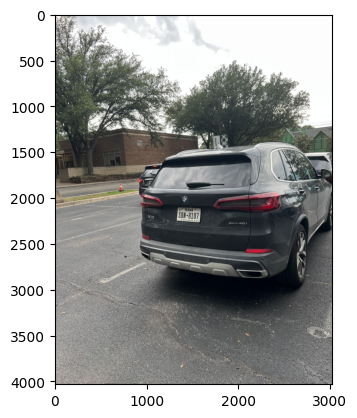

In [34]:
show_color_image(image)
pprint(kids_dict)
print('\n', 'Text Found: ', identified_list)
print('\n', 'Removed Options: ', removed_options)
print('\n', 'Valid Options: ', valid_options)
print('\n', 'Chosen plate: ', plate)
print('\n', 'Kid: ', kids_dict[plate])